In [37]:
import zipfile
import os
from PIL import Image
import numpy as np

# Step 1: Extract the ZIP file
zip_file_path = 'PlantVillageDataset.zip'  # Replace with your ZIP file path
extract_dir = 'ExtractedFiles'  # Directory to extract files

# Extract the ZIP file
if not os.path.exists(extract_dir):  # Avoid re-extraction if already done
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"ZIP file extracted to '{extract_dir}'!")
else:
    print(f"Directory '{extract_dir}' already exists. Skipping extraction.")


Directory 'ExtractedFiles' already exists. Skipping extraction.


In [42]:
# Correct the dataset path
dataset_path = os.path.join(extract_dir, 'PlantVillage')

# Step 2: Load and preprocess images
image_size = (128, 128)  # Resize all images to 128x128
images = []
labels = []

# Debug: Check if the dataset folder exists
if not os.path.exists(dataset_path):
    print(f"Error: Dataset folder '{dataset_path}' not found!")

# Loop through extracted files
for root, dirs, files in os.walk(dataset_path):
    print(f"Scanning directory: {root}, Found {len(files)} files")  # Debugging line
    for file_name in files:
        if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):  # Support more formats
            file_path = os.path.join(root, file_name)

            try:
                # Load the image
                image = Image.open(file_path).convert('RGB')  
                
                # Resize the image
                image = image.resize(image_size)

                # Convert the image to a NumPy array
                image_array = np.array(image) / 255.0  
                images.append(image_array)

                # Extract label from folder name
                label = os.path.basename(root)  
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Step 3: Print dataset summary
if len(images) > 0:
    print(f"Total images loaded: {len(images)}")
    print(f"Image shape: {images[0].shape} (Each image is resized to {image_size})")
    print(f"Unique labels: {set(labels)}")
else:
    print("No images were loaded. Check the dataset path and file formats.")


Scanning directory: ExtractedFiles\PlantVillage, Found 0 files
Scanning directory: ExtractedFiles\PlantVillage\Pepper__bell___Bacterial_spot, Found 997 files
Scanning directory: ExtractedFiles\PlantVillage\Pepper__bell___healthy, Found 1478 files
Scanning directory: ExtractedFiles\PlantVillage\Potato___Early_blight, Found 1000 files
Scanning directory: ExtractedFiles\PlantVillage\Potato___healthy, Found 152 files
Scanning directory: ExtractedFiles\PlantVillage\Potato___Late_blight, Found 1000 files
Scanning directory: ExtractedFiles\PlantVillage\Tomato_Bacterial_spot, Found 2127 files
Scanning directory: ExtractedFiles\PlantVillage\Tomato_Early_blight, Found 1000 files
Scanning directory: ExtractedFiles\PlantVillage\Tomato_Late_blight, Found 1909 files
Scanning directory: ExtractedFiles\PlantVillage\Tomato_Leaf_Mold, Found 952 files
Scanning directory: ExtractedFiles\PlantVillage\Tomato_Septoria_leaf_spot, Found 1771 files
Scanning directory: ExtractedFiles\PlantVillage\Tomato_Spider_m

In [4]:
import tensorflow as tf

# Correct dataset folder path
dataset_folder = "ExtractedFiles/PlantVillage"  # Ensure this points to the folder with class subdirectories

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,   # Use 20% of data for validation
    subset="training",      # Load training subset
    seed=123,               # Seed for reproducibility
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32           # Batch size
)

# Load validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,   # Use the same split percentage
    subset="validation",    # Load validation subset
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Display class names detected
print(f"Class names: {train_dataset.class_names}")


Found 14001 files belonging to 11 classes.
Using 11201 files for training.
Found 14001 files belonging to 11 classes.
Using 2800 files for validation.
Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite']


In [44]:
import tensorflow as tf

# Directory where the dataset is located (same directory as notebook)
dataset_folder = "ExtractedFiles/PlantVillage"  # folder name

# Load and resize dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32           # Number of images per batch
)

# Display dataset information
print(f"Dataset loaded with class names: {dataset.class_names}")

# Verify resizing
for images, labels in dataset.take(1):
    print(f"Batch image shape: {images.shape}")

Found 14001 files belonging to 11 classes.
Dataset loaded with class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite']
Batch image shape: (32, 128, 128, 3)


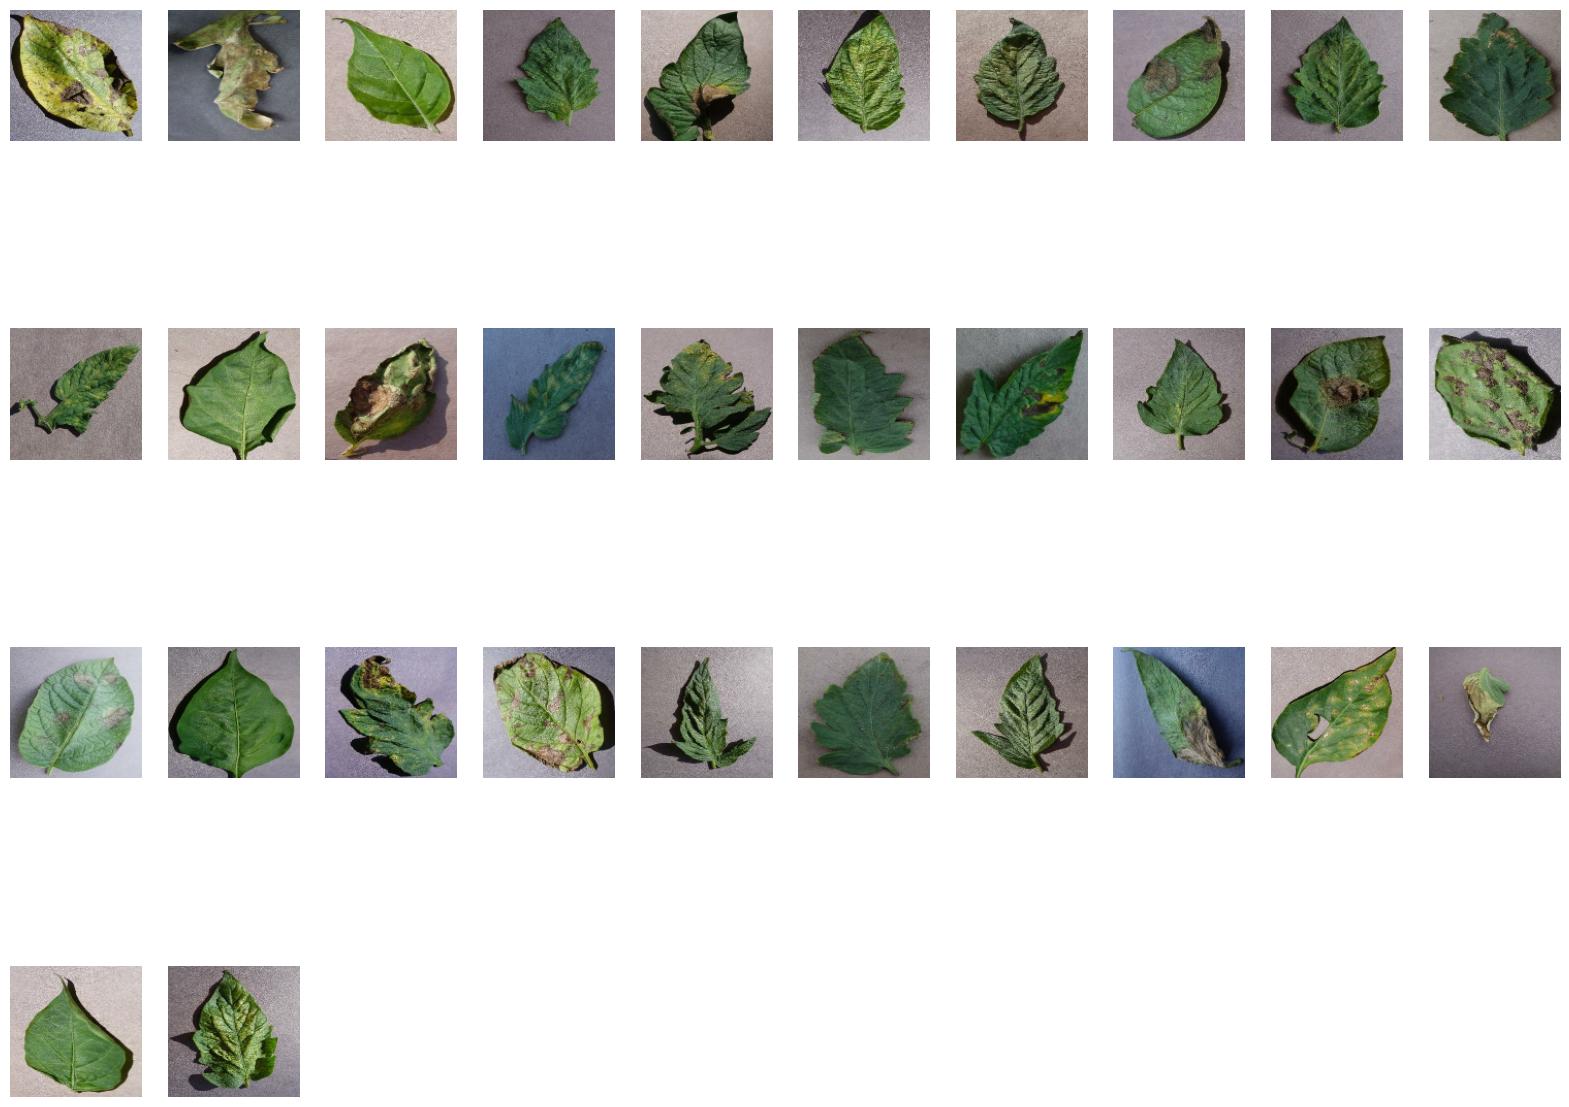

In [46]:
import matplotlib.pyplot as plt

# Display resized images
for images, labels in train_dataset.take(1):  # Take one batch from the dataset
    plt.figure(figsize=(20, 20))
    
    num_images = min(50, images.shape[0])  # Ensure we don't exceed batch size
    for i in range(num_images):  # Loop over available images
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
    
    plt.show()


In [47]:
import tensorflow as tf

# Load dataset from a directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "ExtractedFiles/plantVillage",  # Replace with your dataset directory
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32          # Specify batch size
)

# Normalize pixel values in the dataset
normalized_dataset = dataset.map(lambda x, y: (x / 255.0, y))

# Verify normalization
for images, labels in normalized_dataset.take(1):
    print(f"Image pixel range: {tf.reduce_min(images)} to {tf.reduce_max(images)}")

Found 14001 files belonging to 11 classes.
Image pixel range: 0.0 to 1.0


In [48]:
def handle_color_channels(image, label):
    # Split the color channels
    red_channel = image[:, :, :, 0]  # Red channel
    green_channel = image[:, :, :, 1]  # Green channel
    blue_channel = image[:, :, :, 2]  # Blue channel

    # Example: Set the Red channel to zero
    red_channel = tf.zeros_like(red_channel)

    # Stack the modified channels back together
    image = tf.stack([red_channel, green_channel, blue_channel], axis=-1)

    # Return the processed image and label
    return image, label

In [49]:
# Apply the handle_color_channels function to the dataset
processed_dataset = dataset.map(handle_color_channels)

# Prefetch the dataset to optimize performance
processed_dataset = processed_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

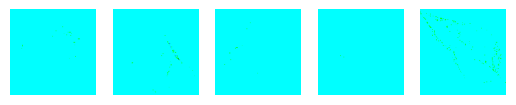

In [50]:
# Visualize a few images from the processed dataset
for images, labels in processed_dataset.take(1):  # Take one batch
    for i in range(5):  # Show the first 5 images
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("float32"))
        plt.axis('off')
    plt.show()

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_dataset.class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
import os
import tensorflow as tf
from PIL import Image

# Correct dataset folder
dataset_folder = "ExtractedFiles/PlantVillage"

# Function to check and remove corrupt images
def clean_dataset(folder):
    removed_files = 0
    for root, dirs, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify if the image is not corrupted
            except (IOError, SyntaxError):
                print(f"Removing corrupt file: {file_path}")
                os.remove(file_path)
                removed_files += 1
    print(f"Total corrupt images removed: {removed_files}")

# Clean dataset before loading
clean_dataset(dataset_folder)

# Reload the dataset with corrected path
def load_dataset(folder, image_size=(128, 128), batch_size=32, subset="training"):
    return tf.keras.preprocessing.image_dataset_from_directory(
        folder,  # Root directory where class folders are located
        image_size=image_size,
        batch_size=batch_size,
        validation_split=0.2,
        subset=subset,
        seed=123
    )

train_dataset = load_dataset(dataset_folder, subset="training")
validation_dataset = load_dataset(dataset_folder, subset="validation")

# Ensure the dataset has multiple classes
num_classes = len(train_dataset.class_names)
if num_classes < 2:
    raise ValueError("Dataset has only one class. Ensure subdirectories for each class.")

print(f"Classes detected: {train_dataset.class_names}")

# Prefetch for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Proceed with model training...


Total corrupt images removed: 0
Found 14001 files belonging to 11 classes.
Using 11201 files for training.
Found 14001 files belonging to 11 classes.
Using 2800 files for validation.
Classes detected: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite']


In [54]:
# Set training parameters
epochs = 20  # You can adjust this based on performance
batch_size = 32  # Same as used in dataset loading

history = model.fit(
    train_dataset,  
    validation_data=validation_dataset,  
    epochs=epochs  
)


# Save the trained model
model.save("cnn_model.h5")
print("Model saved successfully!")


Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 74s 200ms/step - accuracy: 0.2513 - loss: 15.1262 - val_accuracy: 0.3839 - val_loss: 1.8340
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 69s 197ms/step - accuracy: 0.3939 - loss: 1.8373 - val_accuracy: 0.6179 - val_loss: 1.1700
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 70s 199ms/step - accuracy: 0.5514 - loss: 1.3586 - val_accuracy: 0.6125 - val_loss: 1.1664
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 71s 201ms/step - accuracy: 0.6491 - loss: 1.0670 - val_accuracy: 0.6954 - val_loss: 0.9124
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 72s 205ms/step - accuracy: 0.7122 - loss: 0.8394 - val_accuracy: 0.7518 - val_loss: 0.7850
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.7710 - loss: 0.6811 - val_accuracy: 0.7600 - val_loss: 0.7416
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 84s 239ms/step - accuracy: 0.7990 - loss: 0.5913 - val_accuracy: 0.7675 - val_loss: 0.7258
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 89s 253ms/step - accuracy: 0.8351 - loss: 

Model saved successfully!


What This Does:
Trains the CNN model on the training dataset.
Uses the validation dataset to monitor performance.
Runs for 20 epochs (you can adjust based on loss and accuracy).
Saves the trained model for future use.

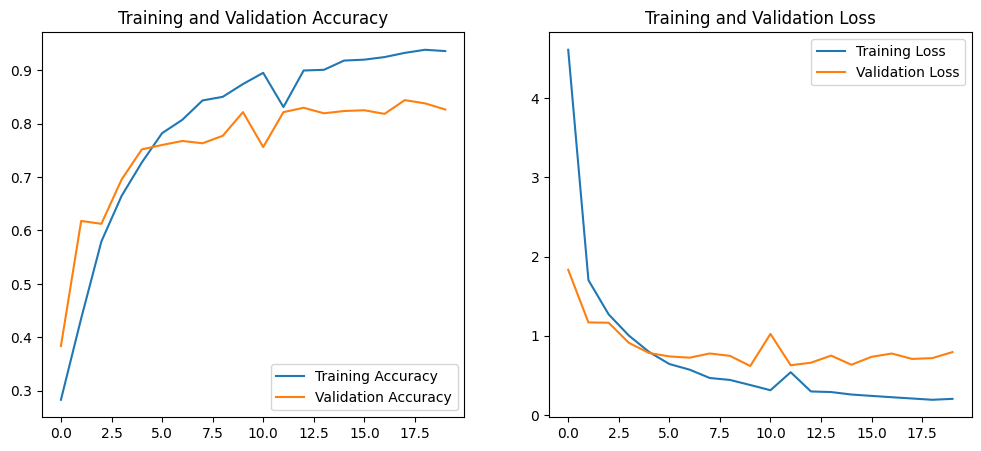

In [55]:
# Extract values from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

What This Does:
Plots training vs. validation accuracy over epochs.
Plots training vs. validation loss over epochs.
Helps identify overfitting (if validation loss increases while training loss decreases).

In [56]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in validation_dataset:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/

In [58]:
print(train_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


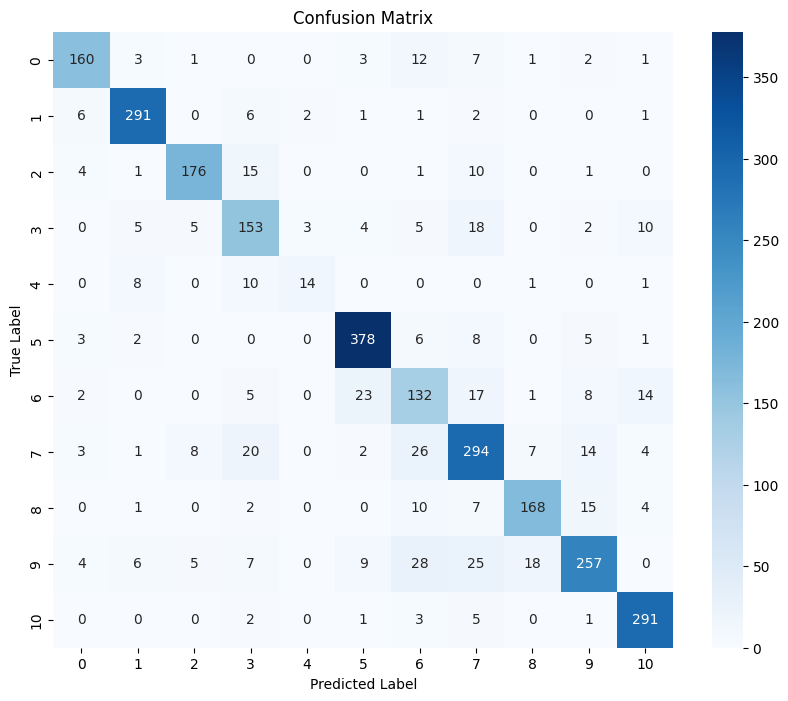

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       190
           1       0.92      0.94      0.93       310
           2       0.90      0.85      0.87       208
           3       0.70      0.75      0.72       205
           4       0.74      0.41      0.53        34
           5       0.90      0.94      0.92       403
           6       0.59      0.65      0.62       202
           7       0.75      0.78      0.76       379
           8       0.86      0.81      0.83       207
           9       0.84      0.72      0.77       359
          10       0.89      0.96      0.92       303

    accuracy                           0.83      2800
   macro avg       0.81      0.79      0.79      2800
weighted avg       0.83      0.83      0.83      2800



In [61]:

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))


What This Does:
Extracts true labels and predicted labels from the validation set.
Computes and plots a confusion matrix to analyze misclassifications.
Displays precision, recall, and F1-score for each class.

Handling Class Imbalance
If your dataset has an unequal number of images per class, the model may be biased toward the majority class. To fix this, we will:

Use Data Augmentation to artificially increase the minority class samples.
Apply Class Weights to give more importance to minority classes.

Step 1: Data Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers


# Data augmentation transformations
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Apply augmentation to the training dataset
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


Step 2: Compute Class Weights

In [63]:
from sklearn.utils.class_weight import compute_class_weight

# Get label distribution
label_counts = np.bincount(y_true)
total_samples = sum(label_counts)
num_classes = len(label_counts)

# Compute class weights
class_weights = {i: total_samples / (num_classes * count) for i, count in enumerate(label_counts)}
print("Class Weights:", class_weights)


Class Weights: {0: 1.3397129186602872, 1: 0.8211143695014663, 2: 1.2237762237762237, 3: 1.2416851441241685, 4: 7.4866310160427805, 5: 0.631626438078051, 6: 1.2601260126012601, 7: 0.671623890621252, 8: 1.2296881862099254, 9: 0.7090402633578121, 10: 0.8400840084008401}


Step 3: Train Model with Class Weights

In [64]:
# Train the model with augmented dataset and class weights
history = model.fit(
    augmented_train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    class_weight=class_weights  # Apply class weights
)


Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 106s 297ms/step - accuracy: 0.3900 - loss: 2.1215 - val_accuracy: 0.5882 - val_loss: 1.3995
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 159s 452ms/step - accuracy: 0.5163 - loss: 1.3955 - val_accuracy: 0.6529 - val_loss: 1.0891
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 155s 441ms/step - accuracy: 0.5557 - loss: 1.2681 - val_accuracy: 0.6743 - val_loss: 0.9405
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 97s 273ms/step - accuracy: 0.6106 - loss: 1.0920 - val_accuracy: 0.5079 - val_loss: 1.5632
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 87s 248ms/step - accuracy: 0.5872 - loss: 1.1895 - val_accuracy: 0.6829 - val_loss: 0.9201
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 83s 235ms/step - accuracy: 0.6444 - loss: 0.9889 - val_accuracy: 0.7146 - val_loss: 0.8785
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 87s 248ms/step - accuracy: 0.6696 - loss: 0.9278 - val_accuracy: 0.7482 - val_loss: 0.7941
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 96s 273ms/step - accuracy: 0.7016 - loss

✅ What This Does:
Data Augmentation makes the model more robust.
Class Weights ensure the model pays equal attention to all classes.

Improving Performance with Transfer Learning
Instead of training a CNN from scratch, we use a pre-trained model (ResNet50) that has already learned rich features from large datasets like ImageNet. This helps improve accuracy and reduce training time.

Step 1: Load Pre-trained Model (ResNet50)
We load ResNet50 without its final layer and attach a custom classifier.

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load ResNet50 as the feature extractor (without top classification layer)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model (prevents re-training existing weights)
base_model.trainable = False

# Create a new classifier head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(train_dataset.class_names), activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,115,083 (91.99 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Step 2: Train the Model
We now train the model with the pre-trained backbone.

In [7]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10  # Fewer epochs since the model is already trained on general features
)


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 290s 808ms/step - accuracy: 0.6617 - loss: 1.0796 - val_accuracy: 0.8818 - val_loss: 0.3442
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 287s 817ms/step - accuracy: 0.8693 - loss: 0.3808 - val_accuracy: 0.9150 - val_loss: 0.2529
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 298s 850ms/step - accuracy: 0.8996 - loss: 0.2944 - val_accuracy: 0.9200 - val_loss: 0.2309
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 295s 841ms/step - accuracy: 0.9082 - loss: 0.2635 - val_accuracy: 0.9339 - val_loss: 0.1895
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 291s 831ms/step - accuracy: 0.9331 - loss: 0.1922 - val_accuracy: 0.9311 - val_loss: 0.1915
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 293s 834ms/step - accuracy: 0.9302 - loss: 0.1883 - val_accuracy: 0.9454 - val_loss: 0.1680
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.9417 - loss: 0.1581 - val_accuracy: 0.9343 - val_loss: 0.1888
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - accuracy: 0.9431 - loss:

Step 3: Fine-Tuning
Once the new layers learn specific features, we unfreeze some layers in ResNet50 for fine-tuning.

In [8]:
# Unfreeze some layers of the base model
base_model.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train again with fine-tuning
history_finetune = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1068s 3s/step - accuracy: 0.7283 - loss: 1.2604 - val_accuracy: 0.9407 - val_loss: 0.2115
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1035s 3s/step - accuracy: 0.9231 - loss: 0.2402 - val_accuracy: 0.9525 - val_loss: 0.1653
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1034s 3s/step - accuracy: 0.9592 - loss: 0.1193 - val_accuracy: 0.9629 - val_loss: 0.1354
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1038s 3s/step - accuracy: 0.9714 - loss: 0.0800 - val_accuracy: 0.9668 - val_loss: 0.1167
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1034s 3s/step - accuracy: 0.9822 - loss: 0.0545 - val_accuracy: 0.9707 - val_loss: 0.1042


✅ What This Does:
Uses ResNet50 as a feature extractor.
Freezes pre-trained layers initially and fine-tunes later.
Improves accuracy with fewer training samples.

Grad-CAM: Visualizing Model Decisions

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Function to generate Grad-CAM heatmaps
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # Create a model that maps the input image to the activations and predictions
    grad_model = Model(
        inputs=model.input, 
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute gradients of the predicted class
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class = tf.argmax(predictions[0])
        loss = predictions[:, predicted_class]

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by the importance weight
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


Step 2: Apply Grad-CAM to a Test Image

In [11]:
import cv2

# Load an image from the validation dataset
img_path = "ExtractedFiles/PlantVillage"  # Replace with an actual image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Generate Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img_array, model, "conv5_block3_out")  # Change based on model architecture

# Superimpose heatmap on the image
heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(np.array(img), 0.6, heatmap, 0.4, 0)

# Display the result
plt.imshow(superimposed_img)
plt.axis("off")
plt.show()


PermissionError: [Errno 13] Permission denied: 'ExtractedFiles/PlantVillage'